In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# Import dataset
dataset = pd.read_csv('cleaned_dataset.csv')

In [42]:
# Convert dataset to pandas DataFrame
df = pd.DataFrame(dataset)

In [43]:
# Inspect the data
df.head()

,BuildingType,PrimaryPropertyType,City,State,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFABuilding(s),Electricity(kWh)
0,NonResidential,Hotel,Seattle,WA,98101.0,7,DOWNTOWN,47.61220,-122.33799,1927,12,88434,1.156514e+06
1,NonResidential,Hotel,Seattle,WA,98101.0,7,DOWNTOWN,47.61317,-122.33393,1996,11,88502,9.504252e+05
2,NonResidential,Hotel,Seattle,WA,98101.0,7,DOWNTOWN,47.61393,-122.33810,1969,41,759392,1.451544e+07
3,NonResidential,Hotel,Seattle,WA,98101.0,7,DOWNTOWN,47.61412,-122.33664,1926,10,61320,8.115253e+05
4,NonResidential,Hotel,Seattle,WA,98121.0,7,DOWNTOWN,47.61375,-122.34047,1980,18,113580,1.573449e+06


In [44]:
# Describe the data
df.describe()

,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFABuilding(s),Electricity(kWh)
count,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3.351000e+03,3.351000e+03
mean,98116.960310,4.443151,47.624028,-122.334805,1968.556849,4.729931,8.732220e+04,1.090909e+06
std,18.631827,2.120329,0.047693,0.027124,33.107013,5.508490,2.086344e+05,4.362413e+06
min,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,3.636000e+03,-3.382680e+04
25%,98105.000000,3.000000,47.600025,-122.350505,1948.000000,2.000000,2.792750e+04,1.883704e+05
50%,98115.000000,4.000000,47.618660,-122.332580,1975.000000,4.000000,4.342200e+04,3.464570e+05
75%,98122.000000,7.000000,47.657045,-122.319557,1997.000000,5.000000,8.474450e+04,8.322397e+05
max,98272.000000,7.000000,47.733870,-122.220966,2015.000000,99.000000,9.320156e+06,1.925775e+08


In [45]:
# Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3351 entries, 0 to 3350
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BuildingType            3351 non-null   object 
 1   PrimaryPropertyType     3351 non-null   object 
 2   City                    3351 non-null   object 
 3   State                   3351 non-null   object 
 4   ZipCode                 3351 non-null   float64
 5   CouncilDistrictCode     3351 non-null   int64  
 6   Neighborhood            3351 non-null   object 
 7   Latitude                3351 non-null   float64
 8   Longitude               3351 non-null   float64
 9   YearBuilt               3351 non-null   int64  
 10  NumberofFloors          3351 non-null   int64  
 11  PropertyGFABuilding(s)  3351 non-null   int64  
 12  Electricity(kWh)        3351 non-null   float64
dtypes: float64(4), int64(4), object(5)
memory usage: 340.5+ KB


<AxesSubplot:>

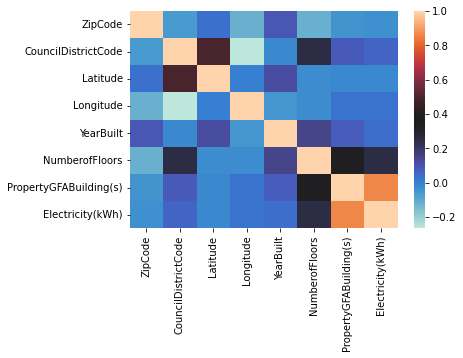

In [46]:
# Inspect the correlation between variables
sns.heatmap(df.corr(), cmap="icefire")

# Plot shows that PorpertyGFA and Electricity are highly correlated
# High correlation between CouncilDistrictCode and Latitude may 
# present challenges due to multicolinearity
# Lasso & Ridge Regression may be suitable options if multicolinearity
# presents challenges

array([[<AxesSubplot:title={'center':'ZipCode'}>,
        <AxesSubplot:title={'center':'CouncilDistrictCode'}>,
        <AxesSubplot:title={'center':'Latitude'}>],
       [<AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'NumberofFloors'}>],
       [<AxesSubplot:title={'center':'PropertyGFABuilding(s)'}>,
        <AxesSubplot:title={'center':'Electricity(kWh)'}>,
        <AxesSubplot:>]], dtype=object)

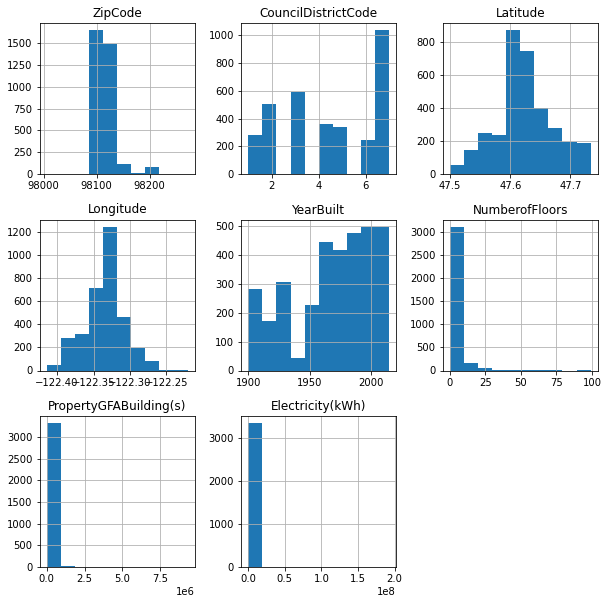

In [47]:
# Plot histograms for columns with numerical data
df.hist(figsize=(10,10))

In [48]:
# Select categorical data
df_cat = df.select_dtypes(include=['object'])

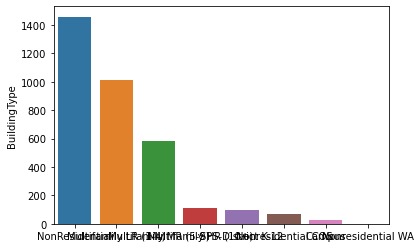

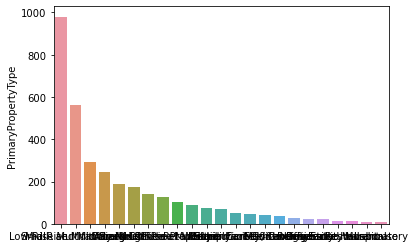

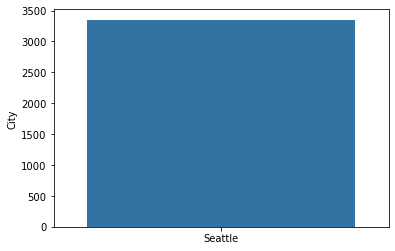

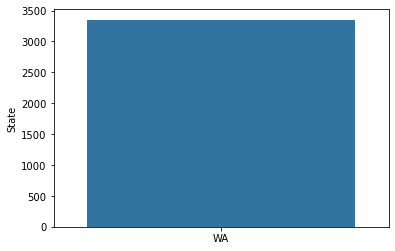

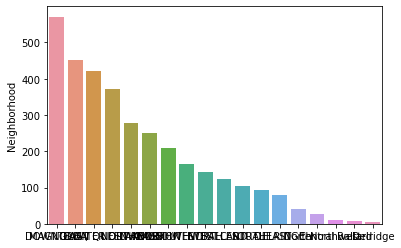

In [49]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    sns.barplot(x=cat_num.index, y=cat_num)
    plt.show()

In [50]:
pd.pivot_table(df, index='BuildingType', values='Electricity(kWh)')

,Electricity(kWh)
BuildingType,
Campus,1.432787e+07
Multifamily HR (10+),1.679325e+06
Multifamily LR (1-4),2.953045e+05
Multifamily MR (5-9),5.555060e+05
NonResidential,1.616276e+06
Nonresidential COS,1.377713e+06
Nonresidential WA,9.322447e+05
SPS-District K-12,5.486694e+05
